In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn. preprocessing import StandardScaler

In [39]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df["TARGET"]=boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [34]:
scaler=StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1]=scaler.transform(df.values[:,:-1])
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


# Train Model with Pytorch

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [28]:
data=torch.from_numpy(df.values).float()
data.shape

torch.Size([506, 14])

In [32]:
y=data[:,-1:]
x=data[:,:-1]
print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [33]:
n_eporchs= 100000
learning_rate=1e-4
print_interval = 5000

# Build Models

## Build model using nn.Module

In [35]:
relu=nn.ReLU()
leaky_relu=nn.LeakyReLU(0.1)

In [40]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim) :
        self.input_dim=input_dim
        self.output_dim=output_dim
        super().__init__()
        
        self.linear1=nn.Linear(input_dim,3)
        self.linear2=nn.Linear(3,3)
        self.linear3=nn.Linear(3,output_dim)
        self.act=nn.LeakyReLU(0.1)
        
    def forward(self,x) :
        # |X|=(batch_size, input_dim)
        h=self.act(self.linear1(x))
        h=self.act(self.linear2(h))
        y=self.linear3(h)
        
        return y
model=MyModel(x.size(-1),y.size(-1))
 
model

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): LeakyReLU(negative_slope=0.1)
)

## Back propagation design

In [41]:
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [43]:
for i in range(n_eporchs):
    y_hat=model(x)
    loss=F.mse_loss(y_hat,y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if(i+1)% print_interval==0:
        print('Epoch %d : loss=%.4e' %(i+1,loss))
        

Epoch 5000 : loss=1.4538e+01
Epoch 10000 : loss=1.2137e+01
Epoch 15000 : loss=1.1393e+01
Epoch 20000 : loss=1.0980e+01
Epoch 25000 : loss=1.0712e+01
Epoch 30000 : loss=1.0597e+01
Epoch 35000 : loss=1.0547e+01
Epoch 40000 : loss=1.0528e+01
Epoch 45000 : loss=1.0516e+01
Epoch 50000 : loss=1.0505e+01
Epoch 55000 : loss=1.0493e+01
Epoch 60000 : loss=1.0481e+01
Epoch 65000 : loss=1.0467e+01
Epoch 70000 : loss=1.0450e+01
Epoch 75000 : loss=1.0431e+01
Epoch 80000 : loss=1.0408e+01
Epoch 85000 : loss=1.0382e+01
Epoch 90000 : loss=1.0353e+01
Epoch 95000 : loss=1.0319e+01
Epoch 100000 : loss=1.0277e+01


# Result plotting

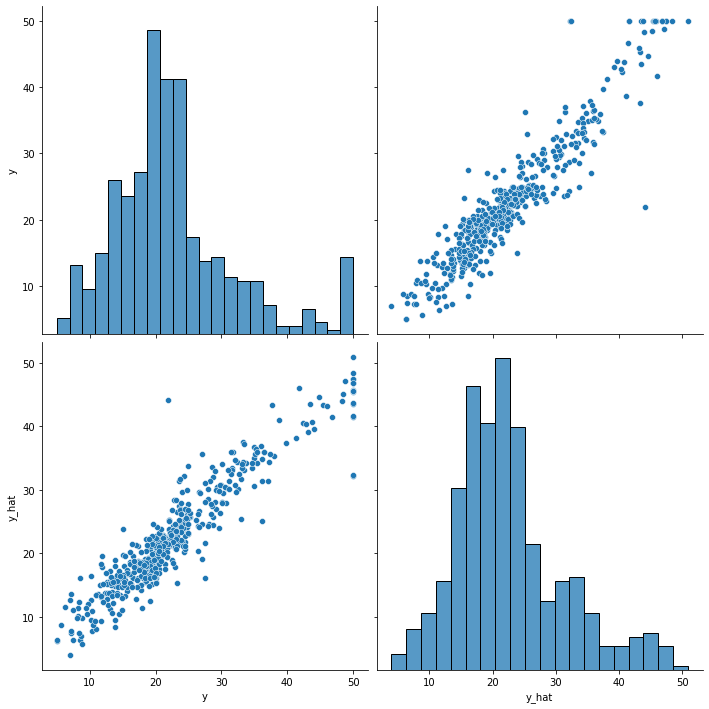

In [46]:
df=pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),
                columns=["y","y_hat"])
sns.pairplot(df,height=5)
plt.show()